###Análisis de Datos y Modelos de Regresión - data_exam1.xlsx


Se dispone de una base de datos en la que "Y" es la variable dependiente y se cuenta con dos variables independientes: "x", una variable cuantitativa, e "ind", una variable categórica.

1. Análisis Exploratorio de Datos (EDA)
Pregunta: ¿Es viable generar un modelo de regresión lineal con la variable categórica (sin interacción) para predecir la variable Y? Justifique.

Proceso:

Se realiza un análisis descriptivo de las variables para comprender su distribución y comportamiento.
Se evalúan las correlaciones entre las variables para determinar si un modelo de regresión lineal sería apropiado.
Se examinan visualmente las relaciones entre las variables mediante gráficos, lo que permite identificar patrones o tendencias que puedan apoyar el uso de un modelo de regresión lineal.

In [2]:
#Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_1samp, shapiro, kstest, anderson, probplot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Ruta del archivo en Google Drive
file_path = '/content/drive/My Drive/data_exam1.xlsx'

# Cargar el archivo Excel
df_data1 = pd.read_excel(file_path, sheet_name='data1')

# Mostrar las primeras filas del DataFrame
df_data1.head(9)



,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0
5,21.268417,3.912493,0
6,59.197617,11.557119,0
7,103.183435,16.854646,0
8,76.383811,14.476791,0


In [ ]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
#Descripcion variables cuantitativas
# Descripción estadística de las variables X e Y
descripcion_XY = df_data1[['X', 'Y']].describe()

# Mostrar el cuadro de descripción
print(descripcion_XY)


                 X            Y
count  1000.000000  1000.000000
mean      9.976858    46.953751
std       3.762567    22.046143
min      -4.263757   -34.894319
25%       7.638899    32.427643
50%       9.952888    45.460252
75%      12.379984    61.587567
max      25.628678   135.542574


In [ ]:
# Describir la distribución de la variable categórica 'ind'
print(df_data1['Ind'].value_counts())


Ind
0    800
1    200
Name: count, dtype: int64


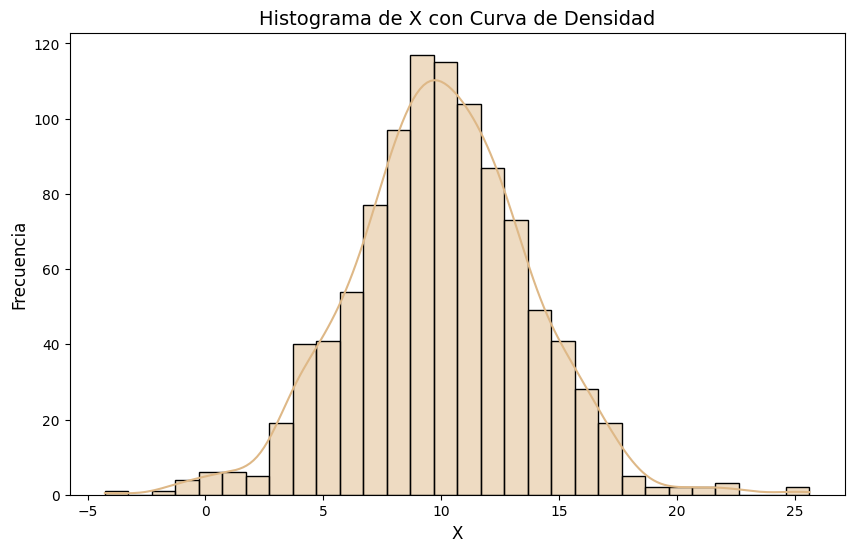

In [5]:
# Histograma de X con curva de densidadaes para tener una visión general de su distribución

plt.figure(figsize=(10, 6))

# Graficar el histograma de 'X'
sns.histplot(df_data1['X'], kde=True, color='#DEB887', bins=30)

# Agregar etiquetas y título
plt.title('Histograma de X con Curva de Densidad', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()


###Se observa que la varibla X tiene una distribución simétrica

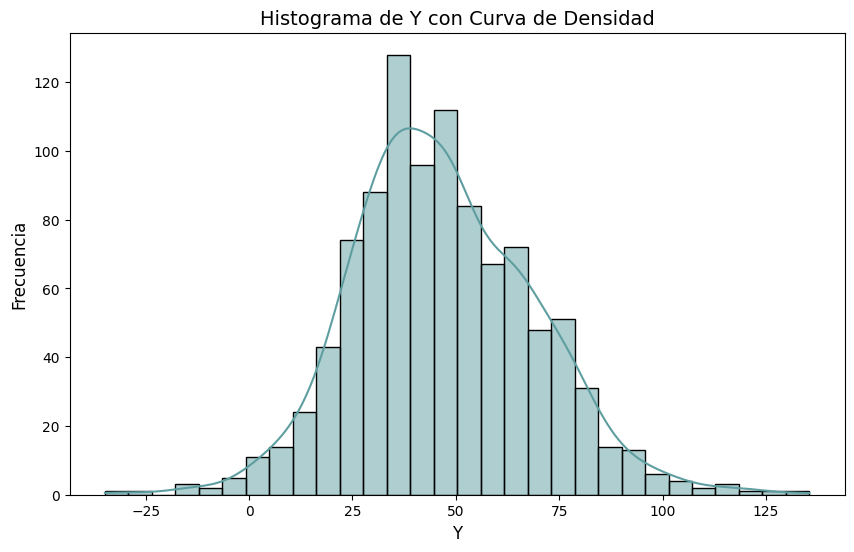

In [ ]:
# Histograma de X con curva de densidadaes para tener una visión general de su distribución

plt.figure(figsize=(10, 6))

# Graficar el histograma de 'X'
sns.histplot(df_data1['Y'], kde=True, color='#5F9EA0', bins=30)

# Agregar etiquetas y título
plt.title('Histograma de Y con Curva de Densidad', fontsize=14)
plt.xlabel('Y', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()

###Se observa que la varibla Y tiene una distribución simétrica

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


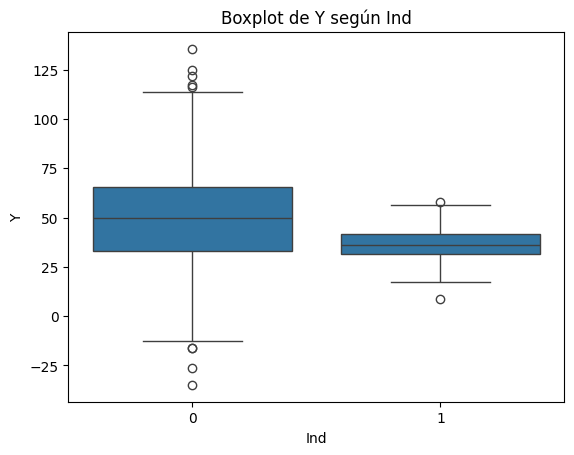

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


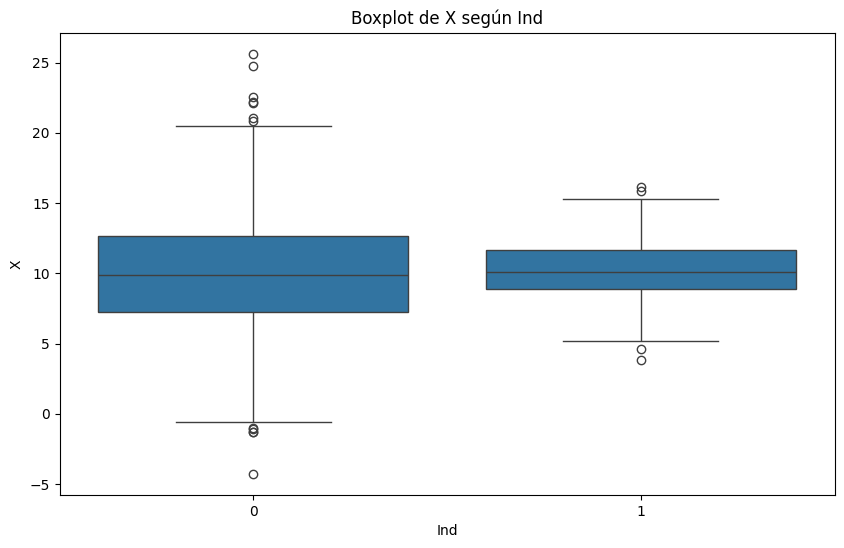

In [ ]:
# Gráfico boxplot para la variable Y en función de ind
sns.boxplot(x='Ind', y='Y', data=df_data1)
plt.title('Boxplot de Y según Ind')
plt.show()

# Gráfico boxplot para la variable X en función de ind
plt.figure(figsize=(10,6))
sns.boxplot(x='Ind', y='X', data=df_data1)
plt.title('Boxplot de X según Ind')
plt.show()

### Se observa la presencia de valores extremos tanto en X como en Y.

array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>,
        <Axes: xlabel='Ind', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>,
        <Axes: xlabel='Ind', ylabel='X'>],
       [<Axes: xlabel='Y', ylabel='Ind'>,
        <Axes: xlabel='X', ylabel='Ind'>,
        <Axes: xlabel='Ind', ylabel='Ind'>]], dtype=object)

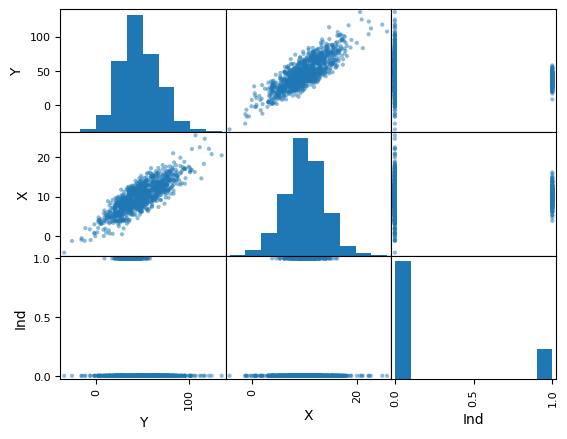

In [ ]:
pd.plotting.scatter_matrix(df_data1)

######En este diagrama de correlaciones se observa las distribuciones de la X y la variable Y, como son las frecuencias de la variable Ind. Hay un correlacion positiva fuerte entre X e Y.

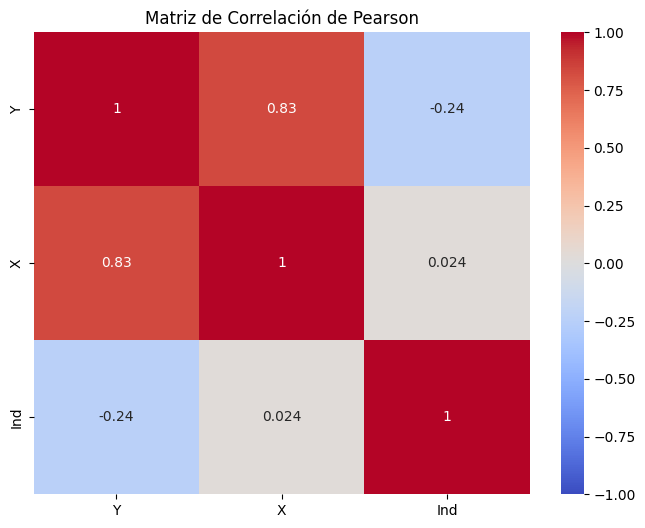

In [7]:

# Generar un mapa de calor para la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación de Pearson")
plt.show()


###En este mapa de calor se confirma  lo observado en el diagrama de correlaciones, hay una correlación fuerte positiva enre la variable X e Y de 0,83.

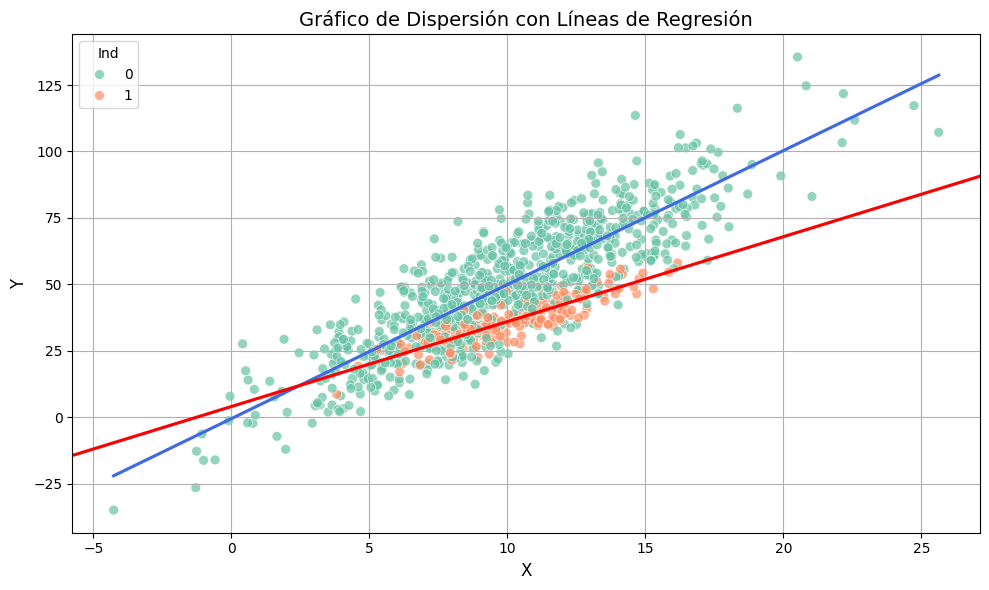

In [ ]:
# Crear un gráfico de dispersión para X y Y según Ind, con puntos más pequeños y líneas de regresión

plt.figure(figsize=(10, 6))

# Graficar los puntos de dispersión con colores diferenciados por 'Ind' y puntos más pequeños
sns.scatterplot(x='X', y='Y', hue='Ind', data=df_data1, palette='Set2', alpha=0.7, marker='o', s=50)

# Generar las rectas de regresión
sns.regplot(x='X', y='Y', data=df_data1[df_data1['Ind'] == 0], scatter=False, color='#4169E1', label="Ind = 0", ci=None)
sns.regplot(x='X', y='Y', data=df_data1[df_data1['Ind'] == 1], scatter=False, color='red', label="Ind = 1", ci=None,truncate=False)

# Etiquetas y título
plt.title('Gráfico de Dispersión con Líneas de Regresión', fontsize=14)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


###En la gráfica anterior se observa la presencia de interacción entre la variba x E Ind, las rectas de regresión no son paralelas, hay un punto de entrecruzamiento y la intercepccion con 0 son diferentes.



In [9]:
# Modelo sin interacción
model_no_interaction = ols('Y ~ X + Ind', data=df_data1).fit()
model_no_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          2.25e-308
Time:                        13:35:08   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7873      0.984      0.800      0.424      -1.143       2.718
X              4.9116      0.091     53.848      0.000       4.733       5.091
Ind          -14.1796      0.858    -16.535      0.000     -15.862     -12.497
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.440
Skew:                           0.078   Prob(JB):                        0.295
Kurtosis:                       3.185   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Modelo con interacción
model_with_interaction = ols('Y ~ X * Ind', data=df_data1).fit()
model_with_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          1.34e-312
Time:                        13:35:10   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4991      1.001     -0.498      0.618      -2.464       1.466
X              5.0411      0.093     53.997      0.000       4.858       5.224
Ind            4.5491      3.674      1.238      0.216      -2.661      11.759
X:Ind         -1.8466      0.353     -5.239      0.000      -2.538      -1.155
==============================================================================
Omnibus:                        4.301   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.811
Skew:                           0.065   Prob(JB):                       0.0902
Kurtosis:                       3.314   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Se realiza la comparacion de los dos modelos, uno sin interacción y otro con interacción, se utilizan las métricas como el Criterio de Información de Akaike (AIC), y R2 ajustado.

In [11]:
# Resumen del modelo sin interacción
print("Modelo sin interacción:")
print(model_no_interaction.summary())

# Resumen del modelo con interacción
print("\nModelo con interacción:")
print(model_with_interaction.summary())

# Comparación de AIC, y R² ajustado
print("\nComparación de modelos:")
print(f"AIC del modelo sin interacción: {model_no_interaction.aic}")
print(f"AIC del modelo con interacción: {model_with_interaction.aic}")
print(f"R² ajustado sin interacción: {model_no_interaction.rsquared_adj}")
print(f"R² ajustado con interacción: {model_with_interaction.rsquared_adj}")


Modelo sin interacción:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          2.25e-308
Time:                        13:35:15   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7873      0

###Resultado de la compración de modelos
Las métricas (AIC y R2 ajustado) indican que el modelo con interacción es superior al modelo sin interacción:

Tiene un AIC más bajo, lo que significa que el modelo con interacción proporciona un mejor ajuste.
El R² ajustado es más alto, lo que indica que el modelo con interacción captura mejor la variabilidad en los datos.

###3. Validación de los Supuestos del Modelo

Esperanza de los errores es cero --- One-sample-t-test

Normalidad en los errores --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling

Independendia en los errores --- Test de autocorrelación de Durbin-Watson (DW test).

Homocedasticidad en los errores (Varianza constante) --- Test Breusch-Pagan

In [12]:
#Esperanza de los errores es cero --- One-sample-t-test
# Residuos vs valores ajustados
# Obtener los residuales y los valores ajustados del modelo con interacción
residuals = model_with_interaction.resid
fitted = model_with_interaction.fittedvalues


##1 Esperanza de los errores es igual a cero

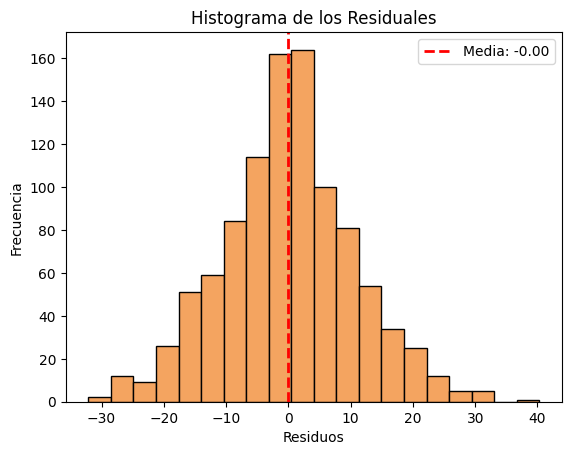

Media residuales: -2.7682744985213503e-14
Resultados t-test: TtestResult(statistic=-8.191269279847636e-14, pvalue=0.9999999999999347, df=999)


In [ ]:
#Esperanza de los errores es cero --- One-sample-t-test
# Crear el histograma de los residuos
plt.hist(residuals, bins=20, color='#F4A460', edgecolor='black')
plt.axvline(np.mean(residuals), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(residuals):.2f}')
plt.title('Histograma de los Residuales')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## One-sample-t-test
print(f"Media residuales: {np.mean(residuals)}")
print("Resultados t-test:", ttest_1samp(residuals, popmean = 0))


#1 Esperanza de los errores es cero
Cumple el supuesto de la normalidad de los errores es igual a cero, como se puede observar en el histograma  con el p-valor del t-test de una muestra.
Con una nivel de significancia $\alpha = 0.05$, y un p-valor de 0,999999, como p-value > $\alpha$, no existe suficiente evidencia muestral para rechazar la hipotesis nula. Por lo tanto NO rechazo la hipotesis nula y puedo  suponer que los residuales están centrados en cero.

1) Media cero: Cumple


Normalidad -> Shapiro-Wilks estaditico: 0.9961399539741608, p_value=0.013784609851119754
No Normalidad -> Kolmogorov-Smirnov estaditico: 0.3878699579223089, p_value=6.035150462587548e-136
Normalidad -> Anderson-Darling estaditico: 1.580915878804035, valorCritico=0.784


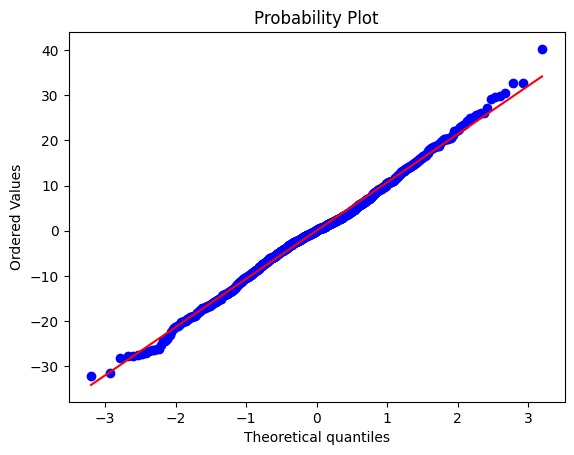

In [ ]:
##Normalidad en los errores --- Test Shapiro-Wilks, Kolmogorov-Smirnov, Anderson-Darling
sw = shapiro(residuals)
print(f"Normalidad -> Shapiro-Wilks estaditico: {sw[0]}, p_value={sw[1]}")

ks = kstest(residuals, 'norm')
print(f"No Normalidad -> Kolmogorov-Smirnov estaditico: {ks[0]}, p_value={ks[1]}")

ad = anderson(residuals, dist='norm')
print(f"Normalidad -> Anderson-Darling estaditico: {ad[0]}, valorCritico={ad[1][2]}")

probplot(residuals, dist = "norm", plot = plt)
plt.show()


#2: Supuesto de normalidad

#Prueba de Shapiro-Wilk:
El p-valor es menor que 0.05, lo que sugiere que se rechaza la hipótesis nula, indicando que los datos no siguen una distribución normal.

#Prueba de Kolmogorov-Smirnov:
Dado que el p-valor es extremadamente bajo, es evidente que se rechaza la hipótesis nula, lo que indica que los datos no siguen una distribución normal.

#Prueba de Anderson-Darling:
El estadístico de Anderson-Darling (1.5809) es mayor que el valor crítico (0.78), lo que significa que se rechaza la hipótesis nula de normalidad, confirmando que los datos no siguen una distribución normal.

#2: Supuesto de normalidad: No cumple

1.9848054259274444


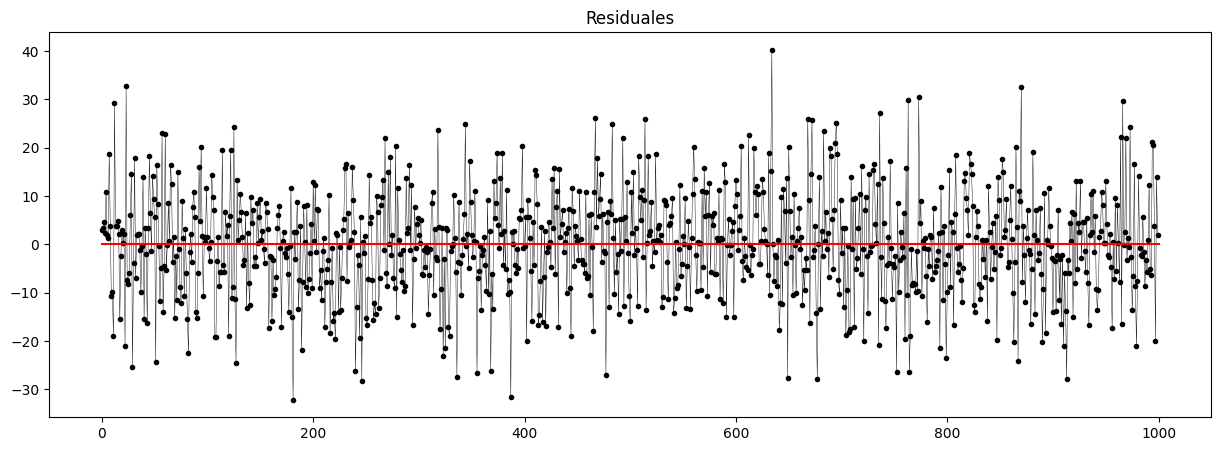

In [ ]:
## 3) Independencia
## H0: Corr(e_i, e_i-1)=0 vs H1: corr(e_i, e_i-1) != 0
print(durbin_watson(residuals))

### Como el estadistico DW es menor a 2.5 y mayor a 1.5 NO existe suficiente evidencia muestral pra rechazar la hopotesis nula,
### por lo tanto puedo suponer independencia en los residuales.

plt.figure(figsize = (15, 5))
plt.plot(residuals, '.-', color = "black", linewidth = 0.3)
plt.plot([0, len(residuals)], [0, 0], color = "red")
plt.title('Residuales')
plt.show()


#3 Independencia
Como el estadistico DW es menor a 2.5 y mayor a 1.5 NO existe suficiente evidencia muestral pra rechazar la hopótesis nula, por lo tanto puedo suponer independencia en los residuales.

Independencia : Cumple

In [ ]:
### 4) Homocedasticidad en los residuales

 ##Aplicar la prueba de Breusch-Pagan para heterocedasticidad
LM, PLM, F_test, p_value = het_breuschpagan(residuals, sm.add_constant(X_interaction_model), robust=False)

# Mostrar los resultados
print(f"Estadístico LM: {LM}")
print(f"p-value del LM: {PLM}")
print(f"F-test: {F_test}")
print(f"p-value del F-test: {p_value}")



Estadístico LM: 96.0881774677955
p-value del LM: 1.0775653909402122e-20
F-test: 30.06607093901476
p-value del F-test: 1.3067597184137587e-18


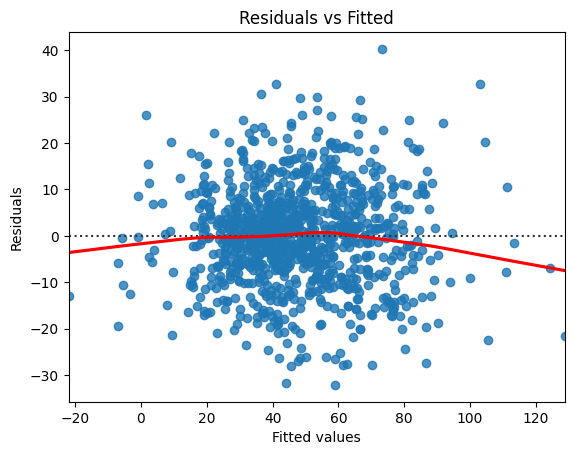

In [ ]:
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


# 4 Homocedasticidad en los residuales
Estadístico LM alto (96.09) y el p-valor muy bajo (1.08e-20) indican que se rechaza la hipótesis nula de homocedasticidad. Esto sugiere que existe heterocedasticidad en los errores del modelo, lo que implica que la varianza de los errores no es constante. De igualmanera se puede observar en la gráfica la no homocedasticidad de los residuales

Conclusión:

El modelo con interacción es el que mejor predice la variable dependiente en función de la variable
X, considerando la interacción entre
X y la variable
Ind. Con un R² ajustado de 0.76, el modelo explica el 76% de la variabilidad en la variable dependiente, lo que puede atribuirse a
X y su interacción con
Ind.

Sin embargo, el modelo no cumple con los supuestos de normalidad ni homocedasticidad de los errores, lo que podría afectar la precisión y validez de las estimaciones.

El análisis exploratorio ha revelado la presencia de valores atípicos en las variables
X e
Y, lo que plantea la necesidad de evaluar cuidadosamente el contexto de estos datos antes de considerar su eliminación. Los valores extremos podrían contener información relevante para el modelo, y su eliminación sin una justificación adecuada podría comprometer la capacidad de generalización del modelo, resultando en un ajuste adecuado para los datos disponibles pero no para nuevas observaciones.

Para abordar esta situación, se recomienda explorar enfoques que preserven la integridad de los datos, como el uso de errores estándar robustos o la transformación de variables, con el fin de mitigar el impacto de los valores atípicos y mejorar la estabilidad del modelo sin perder información valiosa. Esto garantizaría que el modelo sea más robusto y generalizable, manteniendo un equilibrio entre ajuste y validez predictiva